In [1]:
import pandas as pd

In [2]:
circuits = pd.read_csv("../Scraping/f1db_csv/circuits.csv")
constructor_results = pd.read_csv("../Scraping/f1db_csv/constructor_results.csv")
constructor_standings = pd.read_csv("../Scraping/f1db_csv/constructor_standings.csv")
constructors = pd.read_csv("../Scraping/f1db_csv/constructors.csv")
driver_standings = pd.read_csv("../Scraping/f1db_csv/driver_standings.csv")
drivers = pd.read_csv("../Scraping/f1db_csv/drivers.csv")
lap_times = pd.read_csv("../Scraping/f1db_csv/lap_times.csv")
pit_stops = pd.read_csv("../Scraping/f1db_csv/pit_stops.csv")
qualifying = pd.read_csv("../Scraping/f1db_csv/qualifying.csv")
races = pd.read_csv("../Scraping/f1db_csv/races.csv")
results = pd.read_csv("../Scraping/f1db_csv/results.csv")
seasons = pd.read_csv("../Scraping/f1db_csv/seasons.csv")
sprint_results = pd.read_csv("../Scraping/f1db_csv/sprint_results.csv")
status = pd.read_csv("../Scraping/f1db_csv/status.csv")

In [3]:
#merge lap_times and results on raceId
marge1 = pd.merge(lap_times, races, on='raceId')
merge_df = pd.merge(marge1, drivers, on='driverId')


In [4]:
merge_df

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,...,sprint_date,sprint_time,driverRef,number,code,forename,surname,dob,nationality,url_y
0,841,20,1,1,1:38.109,98109,2011,1,1,Australian Grand Prix,...,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
1,841,20,2,1,1:33.006,93006,2011,1,1,Australian Grand Prix,...,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
2,841,20,3,1,1:32.713,92713,2011,1,1,Australian Grand Prix,...,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
3,841,20,4,1,1:32.803,92803,2011,1,1,Australian Grand Prix,...,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
4,841,20,5,1,1:32.342,92342,2011,1,1,Australian Grand Prix,...,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550922,1109,857,66,5,1:23.787,83787,2023,11,11,Hungarian Grand Prix,...,\N,\N,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
550923,1109,857,67,5,1:24.053,84053,2023,11,11,Hungarian Grand Prix,...,\N,\N,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
550924,1109,857,68,5,1:25.152,85152,2023,11,11,Hungarian Grand Prix,...,\N,\N,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
550925,1109,857,69,5,1:24.439,84439,2023,11,11,Hungarian Grand Prix,...,\N,\N,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [5]:
merge_df.describe().T

,count,mean,std,min,25%,50%,75%,max
raceId,550927.0,564.072055,425.681172,1.0,131.0,846.0,975.0,1109.0
driverId,550927.0,296.253732,377.687720,1.0,15.0,39.0,817.0,858.0
lap,550927.0,30.001712,18.425121,1.0,14.0,29.0,44.0,87.0
position,550927.0,9.658537,5.538281,1.0,5.0,9.0,14.0,24.0
milliseconds,550927.0,95678.774551,74837.811818,55404.0,81984.0,90641.0,102183.0,7507547.0
year,550927.0,2010.211903,7.789661,1996.0,2004.0,2011.0,2017.0,2023.0
round,550927.0,9.765740,5.431533,1.0,5.0,9.0,14.0,22.0
circuitId,550927.0,18.671094,19.936578,1.0,6.0,12.0,21.0,79.0


# Data Cleaning


In [6]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        550927 non-null  int64 
 1   driverId      550927 non-null  int64 
 2   lap           550927 non-null  int64 
 3   position      550927 non-null  int64 
 4   time_x        550927 non-null  object
 5   milliseconds  550927 non-null  int64 
 6   year          550927 non-null  int64 
 7   round         550927 non-null  int64 
 8   circuitId     550927 non-null  int64 
 9   name          550927 non-null  object
 10  date          550927 non-null  object
 11  time_y        550927 non-null  object
 12  url_x         550927 non-null  object
 13  fp1_date      550927 non-null  object
 14  fp1_time      550927 non-null  object
 15  fp2_date      550927 non-null  object
 16  fp2_time      550927 non-null  object
 17  fp3_date      550927 non-null  object
 18  fp3_time      550927 non

In [7]:
merge_df.drop(['url_x', 'url_y'], axis=1, inplace=True)

In [8]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        550927 non-null  int64 
 1   driverId      550927 non-null  int64 
 2   lap           550927 non-null  int64 
 3   position      550927 non-null  int64 
 4   time_x        550927 non-null  object
 5   milliseconds  550927 non-null  int64 
 6   year          550927 non-null  int64 
 7   round         550927 non-null  int64 
 8   circuitId     550927 non-null  int64 
 9   name          550927 non-null  object
 10  date          550927 non-null  object
 11  time_y        550927 non-null  object
 12  fp1_date      550927 non-null  object
 13  fp1_time      550927 non-null  object
 14  fp2_date      550927 non-null  object
 15  fp2_time      550927 non-null  object
 16  fp3_date      550927 non-null  object
 17  fp3_time      550927 non-null  object
 18  quali_date    550927 non

In [9]:
merge_df.time_y = merge_df.time_y.str.replace('.', ':')
merge_df.time_x = merge_df.time_x.str.replace('.', ':')

In [10]:
merge_df.time_x = pd.to_timedelta(merge_df.time_x, unit='ms', errors='coerce')
merge_df.time_x

0        0 days 01:39:49
1        0 days 01:33:06
2        0 days 01:43:53
3        0 days 01:45:23
4        0 days 01:37:42
               ...      
550922   0 days 01:36:07
550923   0 days 01:24:53
550924   0 days 01:27:32
550925   0 days 01:31:19
550926   0 days 01:32:23
Name: time_x, Length: 550927, dtype: timedelta64[ns]

In [11]:
merge_df.time_y = pd.to_timedelta(merge_df.time_y, unit='ms', errors='coerce')
merge_df.time_y

0        0 days 06:00:00
1        0 days 06:00:00
2        0 days 06:00:00
3        0 days 06:00:00
4        0 days 06:00:00
               ...      
550922   0 days 13:00:00
550923   0 days 13:00:00
550924   0 days 13:00:00
550925   0 days 13:00:00
550926   0 days 13:00:00
Name: time_y, Length: 550927, dtype: timedelta64[ns]

In [12]:
merge_df.date = pd.to_datetime(merge_df.date)
merge_df.date

0        2011-03-27
1        2011-03-27
2        2011-03-27
3        2011-03-27
4        2011-03-27
            ...    
550922   2023-07-23
550923   2023-07-23
550924   2023-07-23
550925   2023-07-23
550926   2023-07-23
Name: date, Length: 550927, dtype: datetime64[ns]

In [13]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   raceId        550927 non-null  int64          
 1   driverId      550927 non-null  int64          
 2   lap           550927 non-null  int64          
 3   position      550927 non-null  int64          
 4   time_x        550884 non-null  timedelta64[ns]
 5   milliseconds  550927 non-null  int64          
 6   year          550927 non-null  int64          
 7   round         550927 non-null  int64          
 8   circuitId     550927 non-null  int64          
 9   name          550927 non-null  object         
 10  date          550927 non-null  datetime64[ns] 
 11  time_y        399976 non-null  timedelta64[ns]
 12  fp1_date      550927 non-null  object         
 13  fp1_time      550927 non-null  object         
 14  fp2_date      550927 non-null  object         
 15  

In [14]:
merge_df['fp1_date'] = merge_df['fp1_date'].fillna("0")
merge_df['fp1_date'] = pd.to_datetime(merge_df['fp1_date'], errors='coerce')
merge_df['fp1_date']

/var/folders/2y/yvh1znjd4fgb59l_s7m1s_3c0000gn/T/ipykernel_24956/490472205.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merge_df['fp1_date'] = pd.to_datetime(merge_df['fp1_date'], errors='coerce')


0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
550922   2023-07-21
550923   2023-07-21
550924   2023-07-21
550925   2023-07-21
550926   2023-07-21
Name: fp1_date, Length: 550927, dtype: datetime64[ns]

In [15]:
merge_df['fp2_date'] = merge_df['fp2_date'].fillna("0")
merge_df['fp2_date'] = pd.to_datetime(merge_df['fp2_date'], errors='coerce')
merge_df['fp2_date']

/var/folders/2y/yvh1znjd4fgb59l_s7m1s_3c0000gn/T/ipykernel_24956/3994326938.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merge_df['fp2_date'] = pd.to_datetime(merge_df['fp2_date'], errors='coerce')


0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
550922   2023-07-21
550923   2023-07-21
550924   2023-07-21
550925   2023-07-21
550926   2023-07-21
Name: fp2_date, Length: 550927, dtype: datetime64[ns]

In [17]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   raceId        550927 non-null  int64          
 1   driverId      550927 non-null  int64          
 2   lap           550927 non-null  int64          
 3   position      550927 non-null  int64          
 4   time_x        550884 non-null  timedelta64[ns]
 5   milliseconds  550927 non-null  int64          
 6   year          550927 non-null  int64          
 7   round         550927 non-null  int64          
 8   circuitId     550927 non-null  int64          
 9   name          550927 non-null  object         
 10  date          550927 non-null  datetime64[ns] 
 11  time_y        399976 non-null  timedelta64[ns]
 12  fp1_date      60023 non-null   datetime64[ns] 
 13  fp1_time      550927 non-null  object         
 14  fp2_date      60023 non-null   datetime64[ns] 
 15  

In [18]:
merge_df['fp3_date'] = merge_df['fp3_date'].fillna("0")
merge_df['fp3_date'] = pd.to_datetime(merge_df['fp3_date'], errors='coerce')
merge_df['fp3_date']

/var/folders/2y/yvh1znjd4fgb59l_s7m1s_3c0000gn/T/ipykernel_24956/571806616.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merge_df['fp3_date'] = pd.to_datetime(merge_df['fp3_date'], errors='coerce')


0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
550922   2023-07-22
550923   2023-07-22
550924   2023-07-22
550925   2023-07-22
550926   2023-07-22
Name: fp3_date, Length: 550927, dtype: datetime64[ns]

In [19]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   raceId        550927 non-null  int64          
 1   driverId      550927 non-null  int64          
 2   lap           550927 non-null  int64          
 3   position      550927 non-null  int64          
 4   time_x        550884 non-null  timedelta64[ns]
 5   milliseconds  550927 non-null  int64          
 6   year          550927 non-null  int64          
 7   round         550927 non-null  int64          
 8   circuitId     550927 non-null  int64          
 9   name          550927 non-null  object         
 10  date          550927 non-null  datetime64[ns] 
 11  time_y        399976 non-null  timedelta64[ns]
 12  fp1_date      60023 non-null   datetime64[ns] 
 13  fp1_time      550927 non-null  object         
 14  fp2_date      60023 non-null   datetime64[ns] 
 15  

In [21]:
merge_df['fp1_time'] = merge_df['fp1_time'].fillna("0")
merge_df['fp1_time'] = pd.to_timedelta(merge_df['fp1_time'], errors='coerce')

0                    NaT
1                    NaT
2                    NaT
3                    NaT
4                    NaT
               ...      
550922   0 days 11:30:00
550923   0 days 11:30:00
550924   0 days 11:30:00
550925   0 days 11:30:00
550926   0 days 11:30:00
Name: fp1_time, Length: 550927, dtype: timedelta64[ns]

In [22]:
merge_df['fp2_time'] = merge_df['fp2_time'].fillna("0")
merge_df['fp2_time'] = pd.to_timedelta(merge_df['fp2_time'], errors='coerce')

In [23]:
merge_df['fp3_time'] = merge_df['fp3_time'].fillna("0")
merge_df['fp3_time'] = pd.to_timedelta(merge_df['fp3_time'], errors='coerce')


In [24]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   raceId        550927 non-null  int64          
 1   driverId      550927 non-null  int64          
 2   lap           550927 non-null  int64          
 3   position      550927 non-null  int64          
 4   time_x        550884 non-null  timedelta64[ns]
 5   milliseconds  550927 non-null  int64          
 6   year          550927 non-null  int64          
 7   round         550927 non-null  int64          
 8   circuitId     550927 non-null  int64          
 9   name          550927 non-null  object         
 10  date          550927 non-null  datetime64[ns] 
 11  time_y        399976 non-null  timedelta64[ns]
 12  fp1_date      60023 non-null   datetime64[ns] 
 13  fp1_time      36335 non-null   timedelta64[ns]
 14  fp2_date      60023 non-null   datetime64[ns] 
 15  

In [26]:
merge_df['quali_date'] = merge_df['quali_date'].fillna("0")
merge_df['quali_date'] = pd.to_datetime(merge_df['quali_date'], errors='coerce')

/var/folders/2y/yvh1znjd4fgb59l_s7m1s_3c0000gn/T/ipykernel_24956/1097556368.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merge_df['quali_date'] = pd.to_datetime(merge_df['quali_date'], errors='coerce')


In [27]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   raceId        550927 non-null  int64          
 1   driverId      550927 non-null  int64          
 2   lap           550927 non-null  int64          
 3   position      550927 non-null  int64          
 4   time_x        550884 non-null  timedelta64[ns]
 5   milliseconds  550927 non-null  int64          
 6   year          550927 non-null  int64          
 7   round         550927 non-null  int64          
 8   circuitId     550927 non-null  int64          
 9   name          550927 non-null  object         
 10  date          550927 non-null  datetime64[ns] 
 11  time_y        399976 non-null  timedelta64[ns]
 12  fp1_date      60023 non-null   datetime64[ns] 
 13  fp1_time      36335 non-null   timedelta64[ns]
 14  fp2_date      60023 non-null   datetime64[ns] 
 15  

In [28]:
merge_df['quali_time'] = merge_df['quali_time'].fillna("0")
merge_df['quali_time'] = pd.to_timedelta(merge_df['quali_time'], errors='coerce')


In [29]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   raceId        550927 non-null  int64          
 1   driverId      550927 non-null  int64          
 2   lap           550927 non-null  int64          
 3   position      550927 non-null  int64          
 4   time_x        550884 non-null  timedelta64[ns]
 5   milliseconds  550927 non-null  int64          
 6   year          550927 non-null  int64          
 7   round         550927 non-null  int64          
 8   circuitId     550927 non-null  int64          
 9   name          550927 non-null  object         
 10  date          550927 non-null  datetime64[ns] 
 11  time_y        399976 non-null  timedelta64[ns]
 12  fp1_date      60023 non-null   datetime64[ns] 
 13  fp1_time      36335 non-null   timedelta64[ns]
 14  fp2_date      60023 non-null   datetime64[ns] 
 15  

In [30]:
merge_df['sprint_date'] = merge_df['sprint_date'].fillna("0")
merge_df['sprint_date'] = pd.to_datetime(merge_df['sprint_date'], errors='coerce')


/var/folders/2y/yvh1znjd4fgb59l_s7m1s_3c0000gn/T/ipykernel_24956/4157305593.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merge_df['sprint_date'] = pd.to_datetime(merge_df['sprint_date'], errors='coerce')


In [31]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   raceId        550927 non-null  int64          
 1   driverId      550927 non-null  int64          
 2   lap           550927 non-null  int64          
 3   position      550927 non-null  int64          
 4   time_x        550884 non-null  timedelta64[ns]
 5   milliseconds  550927 non-null  int64          
 6   year          550927 non-null  int64          
 7   round         550927 non-null  int64          
 8   circuitId     550927 non-null  int64          
 9   name          550927 non-null  object         
 10  date          550927 non-null  datetime64[ns] 
 11  time_y        399976 non-null  timedelta64[ns]
 12  fp1_date      60023 non-null   datetime64[ns] 
 13  fp1_time      36335 non-null   timedelta64[ns]
 14  fp2_date      60023 non-null   datetime64[ns] 
 15  

In [32]:
merge_df['sprint_time'] = merge_df['sprint_time'].fillna("0")
merge_df['sprint_time'] = pd.to_timedelta(merge_df['sprint_time'], errors='coerce')


In [33]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   raceId        550927 non-null  int64          
 1   driverId      550927 non-null  int64          
 2   lap           550927 non-null  int64          
 3   position      550927 non-null  int64          
 4   time_x        550884 non-null  timedelta64[ns]
 5   milliseconds  550927 non-null  int64          
 6   year          550927 non-null  int64          
 7   round         550927 non-null  int64          
 8   circuitId     550927 non-null  int64          
 9   name          550927 non-null  object         
 10  date          550927 non-null  datetime64[ns] 
 11  time_y        399976 non-null  timedelta64[ns]
 12  fp1_date      60023 non-null   datetime64[ns] 
 13  fp1_time      36335 non-null   timedelta64[ns]
 14  fp2_date      60023 non-null   datetime64[ns] 
 15  

In [37]:
merge_df.number = merge_df.number.str.replace('\\N', '0')
merge_df.number = merge_df.number.astype(int)

In [38]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   raceId        550927 non-null  int64          
 1   driverId      550927 non-null  int64          
 2   lap           550927 non-null  int64          
 3   position      550927 non-null  int64          
 4   time_x        550884 non-null  timedelta64[ns]
 5   milliseconds  550927 non-null  int64          
 6   year          550927 non-null  int64          
 7   round         550927 non-null  int64          
 8   circuitId     550927 non-null  int64          
 9   name          550927 non-null  object         
 10  date          550927 non-null  datetime64[ns] 
 11  time_y        399976 non-null  timedelta64[ns]
 12  fp1_date      60023 non-null   datetime64[ns] 
 13  fp1_time      36335 non-null   timedelta64[ns]
 14  fp2_date      60023 non-null   datetime64[ns] 
 15  

In [41]:
merge_df['dob'] = merge_df['dob'].fillna("0")
merge_df['dob'] = pd.to_datetime(merge_df['dob'], errors='coerce')

In [42]:
merge_df.drop(['driverRef','code','forename','surname','nationality'], axis =1, inplace=True)

In [43]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   raceId        550927 non-null  int64          
 1   driverId      550927 non-null  int64          
 2   lap           550927 non-null  int64          
 3   position      550927 non-null  int64          
 4   time_x        550884 non-null  timedelta64[ns]
 5   milliseconds  550927 non-null  int64          
 6   year          550927 non-null  int64          
 7   round         550927 non-null  int64          
 8   circuitId     550927 non-null  int64          
 9   name          550927 non-null  object         
 10  date          550927 non-null  datetime64[ns] 
 11  time_y        399976 non-null  timedelta64[ns]
 12  fp1_date      60023 non-null   datetime64[ns] 
 13  fp1_time      36335 non-null   timedelta64[ns]
 14  fp2_date      60023 non-null   datetime64[ns] 
 15  

In [44]:
merge_df.to_csv("formula_1.csv")

# Data Analysis

In [53]:
f1_df = pd.read_csv("formula_1.csv")


/var/folders/2y/yvh1znjd4fgb59l_s7m1s_3c0000gn/T/ipykernel_24956/440918040.py:1: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  f1_df = pd.read_csv("formula_1.csv")


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<Axes: xlabel='position', ylabel='lap'>

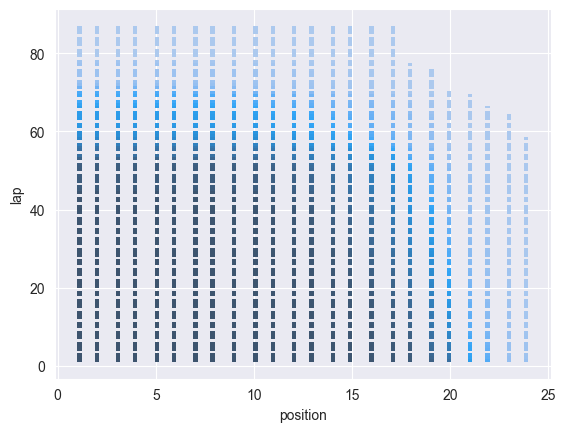